### Step 0 - Install necessary packages

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

### Step 1 - Read and explore the data

In [ ]:
df = pd.read_csv("data/possum.csv")

# Display the first few rows of the DataFrame
print(df.head())

   case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1  Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1     2     1  Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2     3     1  Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3     4     1  Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4     5     1  Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  
3      52.2  15.2   28.0   34.0  
4      53.2  15.1   28.5   33.0  


In [3]:
print(df.columns)
print(df.shape)

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')
(104, 14)


#### Look for patters or trends amongst features and our target variable skull width (skullw)

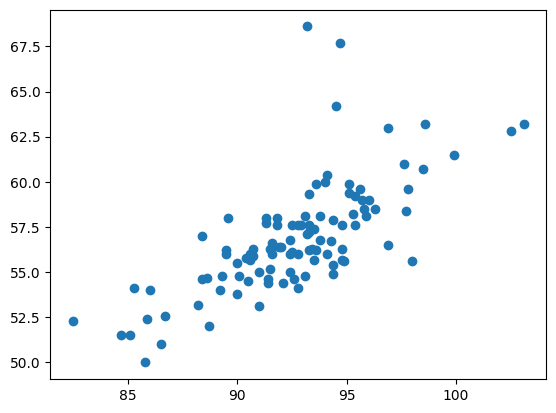

In [4]:
plt.scatter(df['hdlngth'], df['skullw'])

#### We notice a trend in head length and skull width. We will create a model that will predict the width of a possum's skull using the length of its head

### Step 2 - Split the data

In [13]:
from sklearn.model_selection import train_test_split

# X will represent our feature(s) -> head length
# y will represent our target variable -> skull width

X = df['hdlngth']
y = df['skullw']

# Split the data into one set containing the training and validation data (80%) 
# and another set containing the testing data (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training and validation data into their own sets 
# Note -> the validation data should be 10% of the original data 
# so it is 12% of the training and validation data set
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.12, random_state=42)

# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)    

Training set shape: (73,) (73,)
Validation set shape: (10,) (10,)
Test set shape: (21,) (21,)


### Step 3 - Preprocess the data

#### Because we are building a linear regression model, we must handle missing values

In [7]:
print(pd.isna(X_train).sum(), pd.isna(y_train).sum())
print(pd.isna(X_val).sum(), pd.isna(y_val).sum())
print(pd.isna(X_test).sum(), pd.isna(y_test).sum())

0 0
0 0
0 0


#### Because there are no missing values, no other preprocessing steps must be done

### Step 4 - Train the model

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Fit the model to the training datam
model.fit(X_train.values.reshape(-1, 1), y_train)

# Predict the values for the validation set
y_val_pred = model.predict(X_val.values.reshape(-1, 1))

# Calculate the mean squared error for the validation set 
# -> difference between the predicted and actual values

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_val, y_val_pred)
print("Mean Squared Error (Validation):", mse)

Mean Squared Error (Validation): 3.33306555005245


### Test model against test set

In [20]:
y_test_pred = model.predict(X_test.values.reshape(-1, 1))
test_mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (Test):", test_mse)

Mean Squared Error (Test): 3.272368473535185
